In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [47]:
df=pd.read_csv("anmia.csv")

In [3]:
df.head(5)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [4]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [6]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [7]:
df['Diagnosis'].value_counts()

Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64

In [72]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1281   │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 15     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50      ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ WBC            │   0 │     0 │    7.863 │    3.564 │    0.8 │      6 │      7.4 │    8.68 │  45.7 │   ▇▃   │  │
│ │ LYMp           │   0 │     0 │    25.84 │    7.039 │    6.2 │  25.84 │    25.84 │   25.84 │  91.4 │  ▁▇▁   │  │
│ │ NEUTp          │   0 │     0 │    77.51 │    147.7 │    0.7 │   71.1 │    77.51 │   77.51 │  5317 │   ▇    │  │
│ │ LYMn           │   0 │     0 │    1.881 │    1.336 │    0.2 │  1.881 │    1.881 │   1.881 │  41.8 │   ▇    │  │
│ │ NEUTn          │   0 │     0 │    5.141 │    2.872 │    0.5 │    5.1 │    5.141 │   5.141 │    79 │   ▇    │  │
│ │ RBC            │   0 │     0 │    4.708 │    2.817 │   1.36 │   4.19 │      4.6 │     5.1 │  90.8 │   ▇    │  │
│ │ HGB            │   0 │     0 │    12.18 │    3.813 │    -10 │   10.8 │     12.3 │    13.5 │  87.1 │    ▇   │  │
│ │ HCT            │   0 │     0 │    46.15 │    104.9 │      2 │   39.2 │    46.15 │   46.15 │  3715 │   ▇    │  │
│ │ MCV            │   0 │     0 │    85.79 │    27.18 │  -79.3 │   81.2 │     86.6 │    90.2 │   990 │   ▇    │  │
│ │ MCH            │   0 │     0 │    32.08 │    111.2 │   10.9 │   25.5 │     27.8 │    29.6 │  3117 │   ▇    │  │
│ │ MCHC           │   0 │     0 │    31.74 │      3.3 │   11.5 │   30.6 │       32 │    32.9 │  92.8 │    ▇   │  │
│ │ PLT            │   0 │     0 │      230 │    93.02 │     10 │    157 │      213 │     293 │   660 │  ▁▇▅▃  │  │
│ │ PDW            │   0 │     0 │    14.31 │    3.005 │    8.4 │   13.3 │    14.31 │    14.7 │    97 │   ▇    │  │
│ │ PCT            │   0 │     0 │   0.2603 │   0.6854 │   0.01 │   0.17 │   0.2603 │  0.2603 │  13.6 │   ▇    │  │
│ └────────────────┴─────┴───────┴──────────┴──────────┴────────┴────────┴──────────┴─────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Diagnosis                 │       0 │          0 │                          2.3 │                     2913 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

C:\Windows\Temp\ipykernel_6384\807265381.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


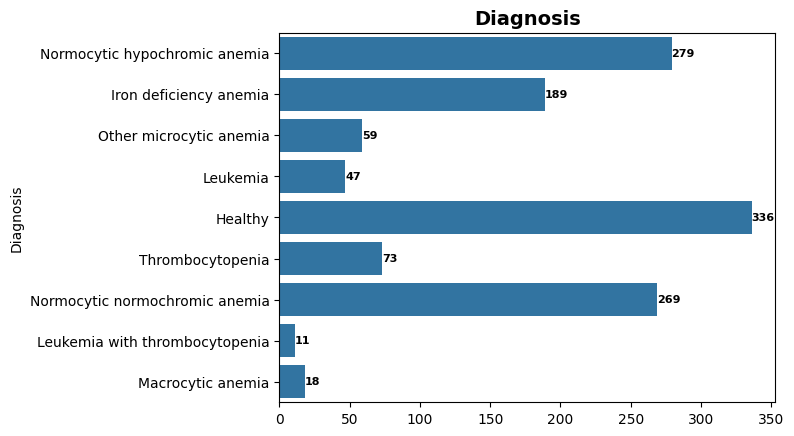

In [47]:
ax = sns.countplot(df, y = 'Diagnosis')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 8, fontweight = 'bold')
    
ax.set_xlabel("")
ax.set_title('Diagnosis', fontsize = 14, fontweight = 'bold')
fig.show()

In [22]:
a=df.WBC.max()
b= df.RBC.max()
c= df.PLT.max()
print("Peak Max Haemoglobin levels",a)
print("Peak Max White blood cell counts",b)
print("Peak Max Red blood cell counts",c)

Peak Max Haemoglobin levels 45.7
Peak Max White blood cell counts 90.8
Peak Max Red blood cell counts 660.0


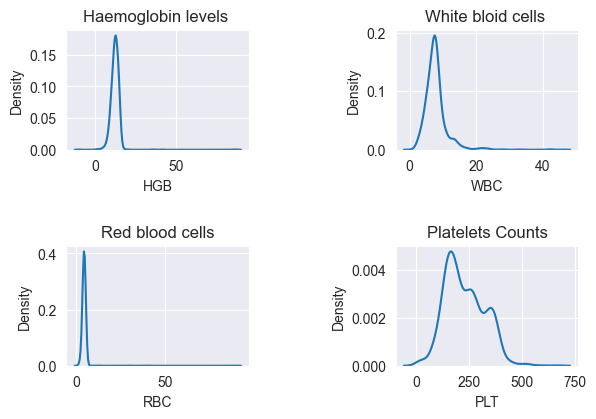

In [48]:
fig=plt.figure()
sns.set_style("darkgrid")
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
sns.kdeplot(data=df['HGB'], ax=ax1) 
sns.kdeplot(data=df['WBC'], ax=ax2)
sns.kdeplot(data=df['RBC'], ax=ax3)
sns.kdeplot(data=df['PLT'], ax=ax4)
ax1.set_title('Haemoglobin levels ')
ax2.set_title('White bloid cells ')
ax3.set_title('Red blood cells')
ax4.set_title('Platelets Counts')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, hspace=0.8, wspace=0.8)

In [49]:
X = df.drop('Diagnosis', axis=1)  # Features (independent variables)
y = df['Diagnosis']  # Target variable (dependent variable)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1024, 14)
y_train shape: (1024,)
X_test shape: (257, 14)
y_test shape: (257,)


In [50]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name} Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
 

C:\Users\SK SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SK SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Metrics:
Accuracy: 0.5875486381322957
Precision: 0.5487867373811203
Recall: 0.5875486381322957
F1 Score: 0.5666704633245678

Decision Tree Metrics:
Accuracy: 0.9922178988326849
Precision: 0.9953307392996109
Recall: 0.9922178988326849
F1 Score: 0.993097225587498

Random Forest Metrics:
Accuracy: 0.9922178988326849
Precision: 0.9932381133149852
Recall: 0.9922178988326849
F1 Score: 0.9922702178795373



In [124]:
df.head(1)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia


In [122]:
### Best model decision tree classifier

In [51]:
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
### Creating a predictive decision tree classifier model
print("Anemia Class prediction ")
a = float(input("WBC    : "))
b = float(input("LYMp   : "))
c = float(input("NEUTp  : "))
d = float(input("LYMn	: "))
e = float(input("NEUTn	: "))
g = float(input("RBC	: "))
h = float(input("HGB	: "))
i = float(input("HCT	: "))
j = float(input("MCV	: "))
k = float(input("MCH	: "))
l = float(input("MCHC	: "))
m = float(input("PLT	: "))
n = float(input("PDW	: "))
o = float(input("PCT	: "))


features = np.array([[a, b, c, d, e,g,h,i,j,k,l,m,n,o]])
print("Type of Anaemia", DT.predict(features))

Anemia Class prediction 


WBC    :  7.863
LYMp   :  25.84
NEUTp  :  77.51
LYMn	:  1.881
NEUTn	:  5.141
RBC	:  4.708
HGB	:  12.81
HCT	:  46.15
MCV	:  85.79
MCH	:  32.08
MCHC	:  31.74
PLT	:  230
PDW	:  14.31
PCT	:  0.2603


Type of Anaemia ['Normocytic hypochromic anemia']


C:\Users\SK SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
